<a href="https://colab.research.google.com/github/LucasJFaust/bibliotecas_py/blob/main/ST_Vari%C3%A1veis_Ex%C3%B3genas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🔍 Case de Séries Temporais com Variáveis Exógenas: Previsão de Preços do Mercado de Ações

Olá, comunidade de ciência de dados! Estou empolgado para compartilhar um projeto recente que desenvolvi no Colab, focado na previsão de preços no mercado de ações usando séries temporais com variáveis exógenas. O dataset que usei, intitulado "price", contém dados históricos das ações da Apple Inc. (AAPL) que remontam a 2008, fornecendo uma visão detalhada das flutuações do mercado durante um período econômico particularmente volátil.

📈 **Dataset "Price": Uma Visão Geral**

O dataset "price" inclui as seguintes colunas, cada uma oferecendo insights valiosos sobre o comportamento do mercado de ações:

- **Date**: A data da observação, fundamental para análises de séries temporais.

- **Open**: O preço de abertura da ação no dia.

- **High**: O preço mais alto atingido pela ação no dia.

- **Low**: O preço mais baixo atingido pela ação no dia.

- **Close**: O preço de fechamento da ação no dia.

- **Adj Close**: O preço de fechamento ajustado, que considera dividendos e desdobramentos de ações.

- **Volume**: O número de ações negociadas durante o dia.

🎯 **Objetivo do Projeto**

O objetivo do meu projeto é prever os preços futuros das ações usando métodos avançados de séries temporais, incorporando não apenas a informação temporal, mas também outras variáveis exógenas que podem influenciar os preços das ações, como o volume de negociações e os preços de abertura, alta e baixa.

🚀 **Abordagem e Metodologia**

Empreguei uma combinação de técnicas de modelagem, incluindo decomposição de séries temporais, escalonamento de dados, e modelagem SARIMAX, que considera tanto a sazonalidade quanto as variáveis exógenas. Meu foco foi em entender as relações dinâmicas entre as diversas variáveis e como elas podem ser utilizadas para fazer previsões precisas sobre movimentos futuros do mercado.

📊 **Visualização e Análise de Dados**

A visualização dos dados e dos resultados das previsões foi uma parte crucial do projeto. Ela não apenas ajudou a entender a eficácia dos modelos, mas também proporcionou insights intuitivos sobre as tendências do mercado.

🔥 **Desafio para a Comunidade**

Este projeto é um excelente exemplo de como as técnicas de séries temporais podem ser aplicadas para prever movimentos no mercado de ações, um dos desafios mais intrigantes no campo da análise financeira. Convido todos a explorarem este caso, compartilharem suas ideias e abordagens e talvez até melhorarem o modelo com suas próprias técnicas e insights.

#Etapa 1: Importação de Bibliotecas e Carregamento de Dados

Aqui, importamos as bibliotecas necessárias para manipulação de dados (pandas e numpy), bem como para visualização (matplotlib.pyplot e seaborn). O pd.read_csv() carrega o dataset de preços e df.head() exibe as primeiras linhas para uma visão inicial.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("price.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000


#Etapa 2: Criação de Novas Variáveis e Análise Descritiva

Calculamos a média dos preços de abertura e fechamento para obter uma nova variável 'Mean'. Utilizamos describe() para obter um resumo estatístico e info() para obter informações sobre o tipo de dados e valores nulos.

In [4]:
df["Mean"] = (df["Low"] + df["High"])/2

In [5]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393


In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Mean
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2.767000e+03,2767.000000
mean,24.130040,24.348642,23.904208,24.131645,22.209583,3.525735e+08,24.126425
std,13.940933,14.060405,13.830406,13.947150,13.769325,2.954459e+08,13.944693
min,2.835357,2.928571,2.792857,2.792857,2.384630,4.544800e+07,2.860714
25%,12.749643,12.849286,12.617143,12.722679,10.863028,1.352148e+08,12.728304
50%,22.592501,22.812143,22.420357,22.629999,19.627819,2.712696e+08,22.624821
75%,32.278751,32.613750,32.075001,32.271250,29.324970,4.652326e+08,32.321250
max,57.695000,58.367500,57.445000,58.017502,55.894947,2.294398e+09,57.906250


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2767 non-null   object 
 1   Open       2767 non-null   float64
 2   High       2767 non-null   float64
 3   Low        2767 non-null   float64
 4   Close      2767 non-null   float64
 5   Adj Close  2767 non-null   float64
 6   Volume     2767 non-null   int64  
 7   Mean       2767 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 173.1+ KB


#Etapa 3: Preparação dos Dados para Modelagem

Preparamos os dados para a análise de séries temporais, criando uma coluna 'Actual' que representa o valor futuro da média. A função shift() é usada para deslocar os dados no tempo. Convertemos a coluna 'Date' para o formato datetime e a definimos como índice do DataFrame.

In [6]:
steps = -1
df_for_prediction = df.copy()
df_for_prediction["Actual"] = df_for_prediction["Mean"].shift(steps)

In [7]:
df_for_prediction.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964,3.327143


In [8]:
df_for_prediction = df_for_prediction.dropna()

In [9]:
df_for_prediction["Date"] = pd.to_datetime(df_for_prediction["Date"])
df_for_prediction.index = df_for_prediction["Date"]

#Etapa 4: Visualização dos Dados

Usamos um gráfico de linha para visualizar a série temporal da média dos preços.

<Axes: xlabel='Date'>

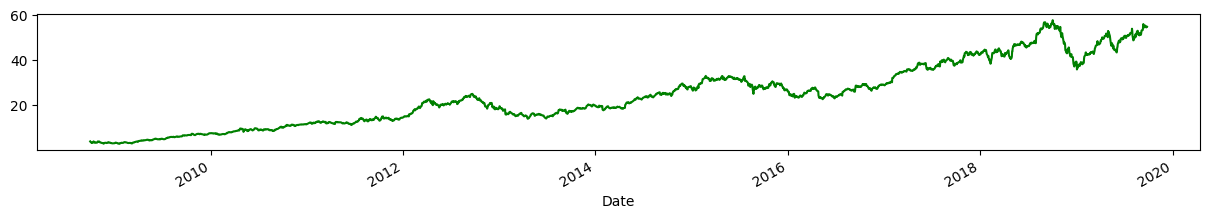

In [11]:
df_for_prediction["Mean"].plot(color="green", figsize=(15,2))

# Etapa 5: Decomposição de Séries Temporais

Realizamos uma decomposição de séries temporais para identificar tendências, sazonalidade e componentes residuais. seasonal_decompose é uma ferramenta poderosa para entender os padrões subjacentes na série.

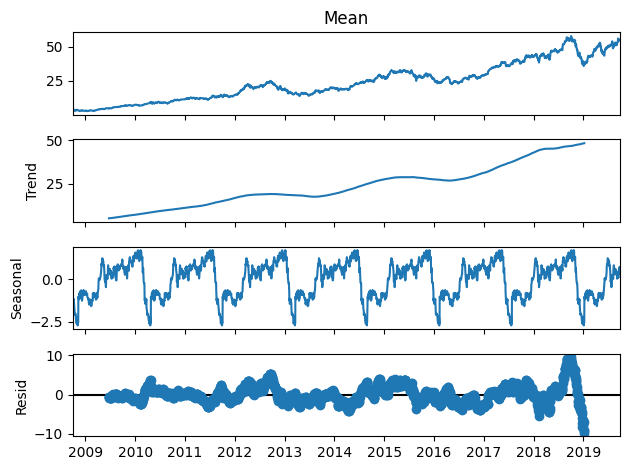

In [12]:
import statsmodels.api as sm
sd = sm.tsa.seasonal_decompose(df_for_prediction["Mean"], model = "add", period=365);
fig=sd.plot()
plt.show()

#Etapa 6: Escalonamento dos Dados

Escalonamos os dados para que todas as variáveis tenham a mesma escala, o que é importante para muitos modelos de machine learning. Aqui, usamos o MinMaxScaler para transformar os dados para um intervalo entre 0 e 1.

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0,1))
scaled_input = sc_in.fit_transform(df_for_prediction[["Low", "High", "Open", "Close", "Volume", "Adj Close", "Mean"]])
scaled_input = pd.DataFrame(scaled_input)
X = scaled_input

In [17]:
sc_in = MinMaxScaler(feature_range=(0,1))
scaled_output = sc_in.fit_transform(df_for_prediction[["Actual"]])
scaled_output = pd.DataFrame(scaled_output)
y = scaled_output

In [18]:
X.rename(columns={0:"Low", 1:"High", 2:"Open", 3:"Close", 4:"Volume", 5:"Adj Close", 6:"Mean"}, inplace=True)
X.index=df_for_prediction.index
X.head(2)

,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.01762,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.01248,0.015763


In [19]:
y.rename(columns={0:"Preco_acao"}, inplace=True)
y.index=df_for_prediction.index
y.head(2)

,Preco_acao
Date,
2008-10-01,0.015763
2008-10-02,0.013284


#Etapa 7: Divisão dos Dados em Treino e Teste

Dividimos os dados em conjuntos de treino e teste. Isso é crucial para validar o desempenho do modelo em dados não vistos.

In [21]:
train_size = int(len(df)*0.7)
test_size = int(len(df)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[:train_size].dropna()

In [22]:
!pip install scipy

In [24]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.4 MB/s eta 0:00:00


#Etapa 8: Modelagem ARIMA com Variáveis Exógenas

**auto_arima** é usado para encontrar automaticamente os melhores parâmetros (p, d, q) para um modelo ARIMA. Aqui, incorporamos variáveis exógenas para melhorar a precisão das previsões.

In [25]:
from pmdarima.arima import auto_arima

In [26]:
step_wise = auto_arima(train_y,
                       exogenous=train_X,
                       start_p=1, start_q=1,
                       max_p=7, max_q=7,
                       d=1, max_d=7,
                       trace=True,
                       error_action="ignore",
                       suppress_warnings=True,
                       stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15130.709, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15077.042, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15127.374, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15132.095, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15075.928, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15130.986, Time=1.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15130.275, Time=2.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15131.797, Time=0.53 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 6.987 seconds


In [27]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1936
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7569.047
Date:                Fri, 26 Jan 2024   AIC                         -15132.095
Time:                        18:01:23   BIC                         -15115.391
Sample:                             0   HQIC                        -15125.952
                               - 1936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.414      0.157    -7.4e-05       0.000
ma.L1          0.1723      0.013     13.155      0.000       0.147       0.198
sigma2      2.339e-05   3.08e-07     75.974      0.000    2.28e-05     2.4e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9198.02
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.10   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
train_X = np.array(train_X)
train_y = np.array(train_y)

#Etapa 9: Treinamento do Modelo SARIMAX

O modelo SARIMAX é uma extensão do ARIMA que suporta variáveis exógenas e sazonalidade. Este modelo é adequado para dados com padrões sazonais e/ou com influências externas.

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model = SARIMAX(train_y,
                exog=train_X,
                order = (0,1,1),
                enforce_invertibility=False, enforce_stationarity=False)

In [33]:
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#Etapa 10: Predições e Avaliação do Modelo

Realizamos previsões com o modelo SARIMAX e calculamos o erro quadrático médio (MSE) para avaliar a precisão do modelo.

In [34]:
predicoes = results.predict(start = train_size, end=train_size+test_size+(steps)-1, exog=test_X)

In [35]:
act = pd.DataFrame(scaled_output.iloc[train_size:, 0])

In [36]:
act.index = test_X.index

In [38]:
predicoes = pd.DataFrame(predicoes)
predicoes.reset_index(drop=True, inplace=True)
predicoes.index=test_X.index
predicoes["Actual"] = act["Preco_acao"]
predicoes.rename(columns={0:"pred"}, inplace=True)

#Etapa 11: Visualização das Predições

Visualizamos as previsões do modelo em comparação com os valores reais para entender visualmente a precisão das previsões.

<Axes: xlabel='Date'>

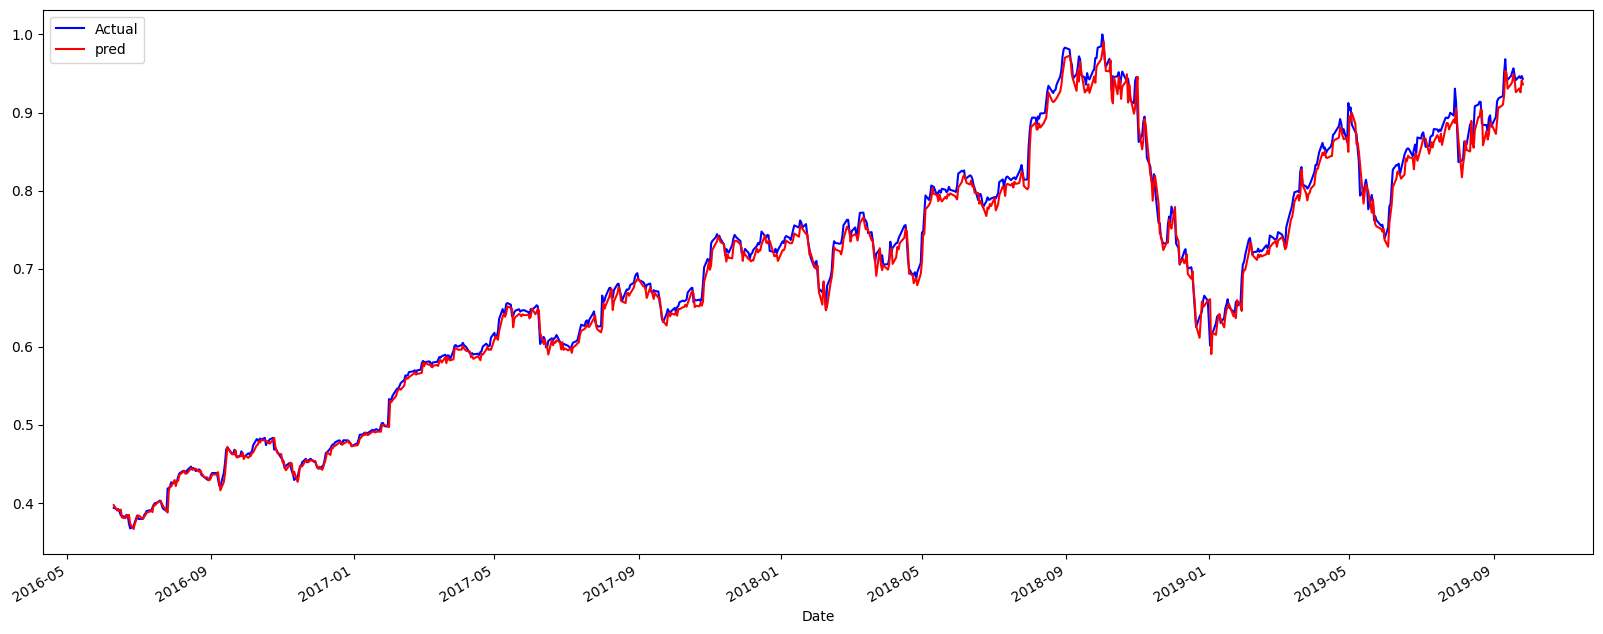

In [40]:
predicoes["Actual"].plot(figsize=(20, 8), legend=True, color= "blue")
predicoes["pred"].plot(legend=True, color="red", figsize=(20, 8))

In [41]:
from statsmodels.tools.eval_measures import mse

In [42]:
error = mse(predicoes["pred"], predicoes["Actual"])

In [43]:
error

0.00013821411633853532